In [3]:
import re
import collections
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
data = data.dropna(subset=['name', 'host_name'])
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# One-hot encode selected columns
data = pd.get_dummies(data, columns=['neighbourhood_group', 'room_type'], drop_first=True)

#data = pd.get_dummies(data, columns=['neighbourhood'], drop_first=True)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,True,False,False,False,True,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,False,True,False,False,False,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,False,True,False,False,True,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,True,False,False,False,False,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,NaN,NaN,2,9,True,False,False,False,True,False
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,NaN,NaN,2,36,True,False,False,False,True,False
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,NaN,NaN,1,27,False,True,False,False,False,False
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,NaN,NaN,6,2,False,True,False,False,False,True


In [7]:
data.to_csv("cleaned_airbnb_data.csv", index=False)

Frank

In [8]:
data = pd.read_csv("cleaned_airbnb_data.csv")

https://www.hoteldive.com/news/middle-income-travelers-spending-less/724070/

https://nypost.com/2024/04/16/business/budget-hotel-vacancies-top-50-as-inflation-weary-americans-cut-back-on-travel/?utm_source=chatgpt.com

National Economy hotel is $70 one night; middle-income travelers tend to spend $140 per night on average.

Therefore, we set three levels: 0-$70 Economy; $71-$140 Middle-level; >$140 Luxury

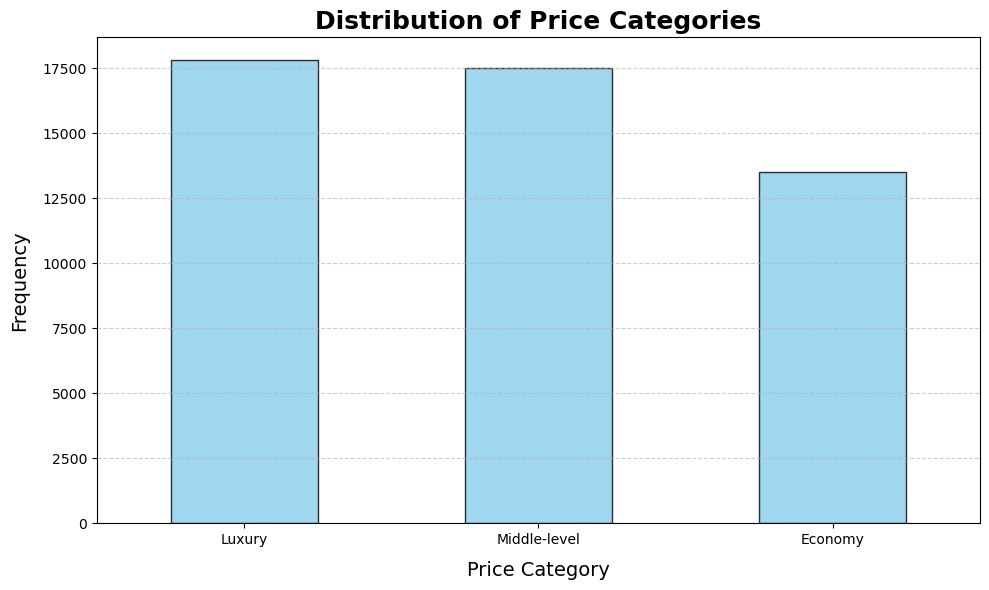

In [9]:
data['price_category'] = pd.cut(
    data['price'],
    bins=[0, 70, 140, float('inf')],
    labels=['Economy', 'Middle-level', 'Luxury']
)

# Plot the histogram for the price categories
plt.figure(figsize=(10, 6))
data['price_category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of Price Categories', fontsize=18, fontweight='bold')
plt.xlabel('Price Category', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Further clean

In [10]:
data = data.drop(columns=['id','name','host_id','host_name'])
data = data.dropna() 
# Drop the rows with missing values and columns that are not needed

Cluster

Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\ProgramData\Anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\ProgramData\Anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcd in position 24: invalid continuation byte
c:\ProgramData\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\Anaconda3\Lib\sit

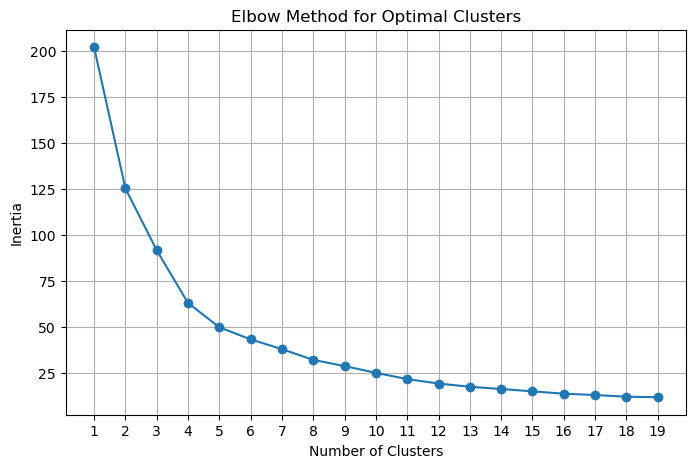

In [11]:
from sklearn.cluster import KMeans

# Extract longitude and latitude for clustering
coordinates = data[['latitude', 'longitude']]

# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 20)  # Test 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

# Fit the KMeans model with the optimal number of clusters

In [12]:
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(coordinates)
data = data.drop(columns=['latitude','longitude'])

In [13]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [14]:
import folium
print(kmeans.cluster_centers_)
# Create a base map centered around NYC
map_center = [40.7128, -74.0060]  # Approximate center of NYC
nyc_map = folium.Map(location=map_center, zoom_start=12)

# Add cluster center points with labels
for i, center in enumerate(kmeans.cluster_centers_):
    folium.Marker(
        location=center,
        popup=f'Cluster {i}',
        icon=folium.DivIcon(html=f"""
            <div style="font-size: 16px; color: blue;">
                Cluster {i}
            </div>
        """)
    ).add_to(nyc_map)   
#Create a map with the clusters
nyc_map


[[ 40.71087128 -73.8200211 ]
 [ 40.73910954 -73.98658603]
 [ 40.69718137 -73.93690921]
 [ 40.80482875 -73.9383723 ]
 [ 40.65503959 -73.98406418]]


In [15]:
from datetime import datetime

# Convert 'last_review' to datetime
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# Extract other features
data['last_review_month'] = data['last_review'].dt.month
data=data.drop(columns=['last_review'])

In [16]:
# Move 'price' and 'price_category' columns to the end
columns_to_move = ['price', 'price_category']
data = data[[col for col in data.columns if col not in columns_to_move] + columns_to_move]
data

,neighbourhood,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,cluster,last_review_month,price,price_category
0,Kensington,1,9,0.21,6,365,True,False,False,False,True,False,4,10,149,Luxury
1,Midtown,1,45,0.38,2,355,False,True,False,False,False,False,1,5,225,Luxury
3,Clinton Hill,1,270,4.64,1,194,True,False,False,False,False,False,2,7,89,Middle-level
4,East Harlem,10,9,0.10,1,0,False,True,False,False,False,False,3,11,80,Middle-level
5,Murray Hill,3,74,0.59,1,129,False,True,False,False,False,False,1,6,200,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48745,Upper East Side,1,1,1.00,1,147,False,True,False,False,True,False,3,7,129,Middle-level
48753,Flushing,1,1,1.00,6,339,False,False,True,False,True,False,0,7,45,Economy
48762,Great Kills,1,1,1.00,1,87,False,False,False,True,True,False,4,7,235,Luxury
48768,Mott Haven,1,2,2.00,1,40,False,False,False,False,False,False,3,7,100,Middle-level


In [17]:
data.to_csv("airbnb_data_input.csv", index=False)

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Detailed Model Performance Metrics:

Logistic Regression:
------------------------------
Accuracy: 0.6330
Macro F1: 0.6326
Weighted F1: 0.6232
Macro Precision: 0.6277
Macro Recall: 0.6459
F1 (Class Economy): 0.7238
F1 (Class Luxury): 0.7027
F1 (Class Middle-level): 0.4713
ROC-AUC: 0.8078
PR-AUC: 0.6595

Random Forest:
------------------------------
Accuracy: 0.6530
Macro F1: 0.6540
Weighted F1: 0.6458
Macro Precision: 0.6501
Macro Recall: 0.6638
F1 (Class Economy): 0.7340
F1 (Class Luxury): 0.7181
F1 (Class Middle-level): 0.5099
ROC-AUC: 0.8267
PR-AUC: 0.6976

Gradient Boosting:
------------------------------
Accuracy: 0.6373
Macro F1: 0.6401
Weighted F1: 0.6326
Macro Precision: 0.6363
Macro Recall: 0.6466
F1 (Class Economy): 0.7119
F1 (Class Luxury): 0.7033
F1 (Class Middle-level): 0.5052
ROC-AUC: 0.8138
PR-AUC: 0.6753


C:\Users\香蕉橡皮\AppData\Local\Temp\ipykernel_35568\1347993151.py:131: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # Use seaborn style for modern look


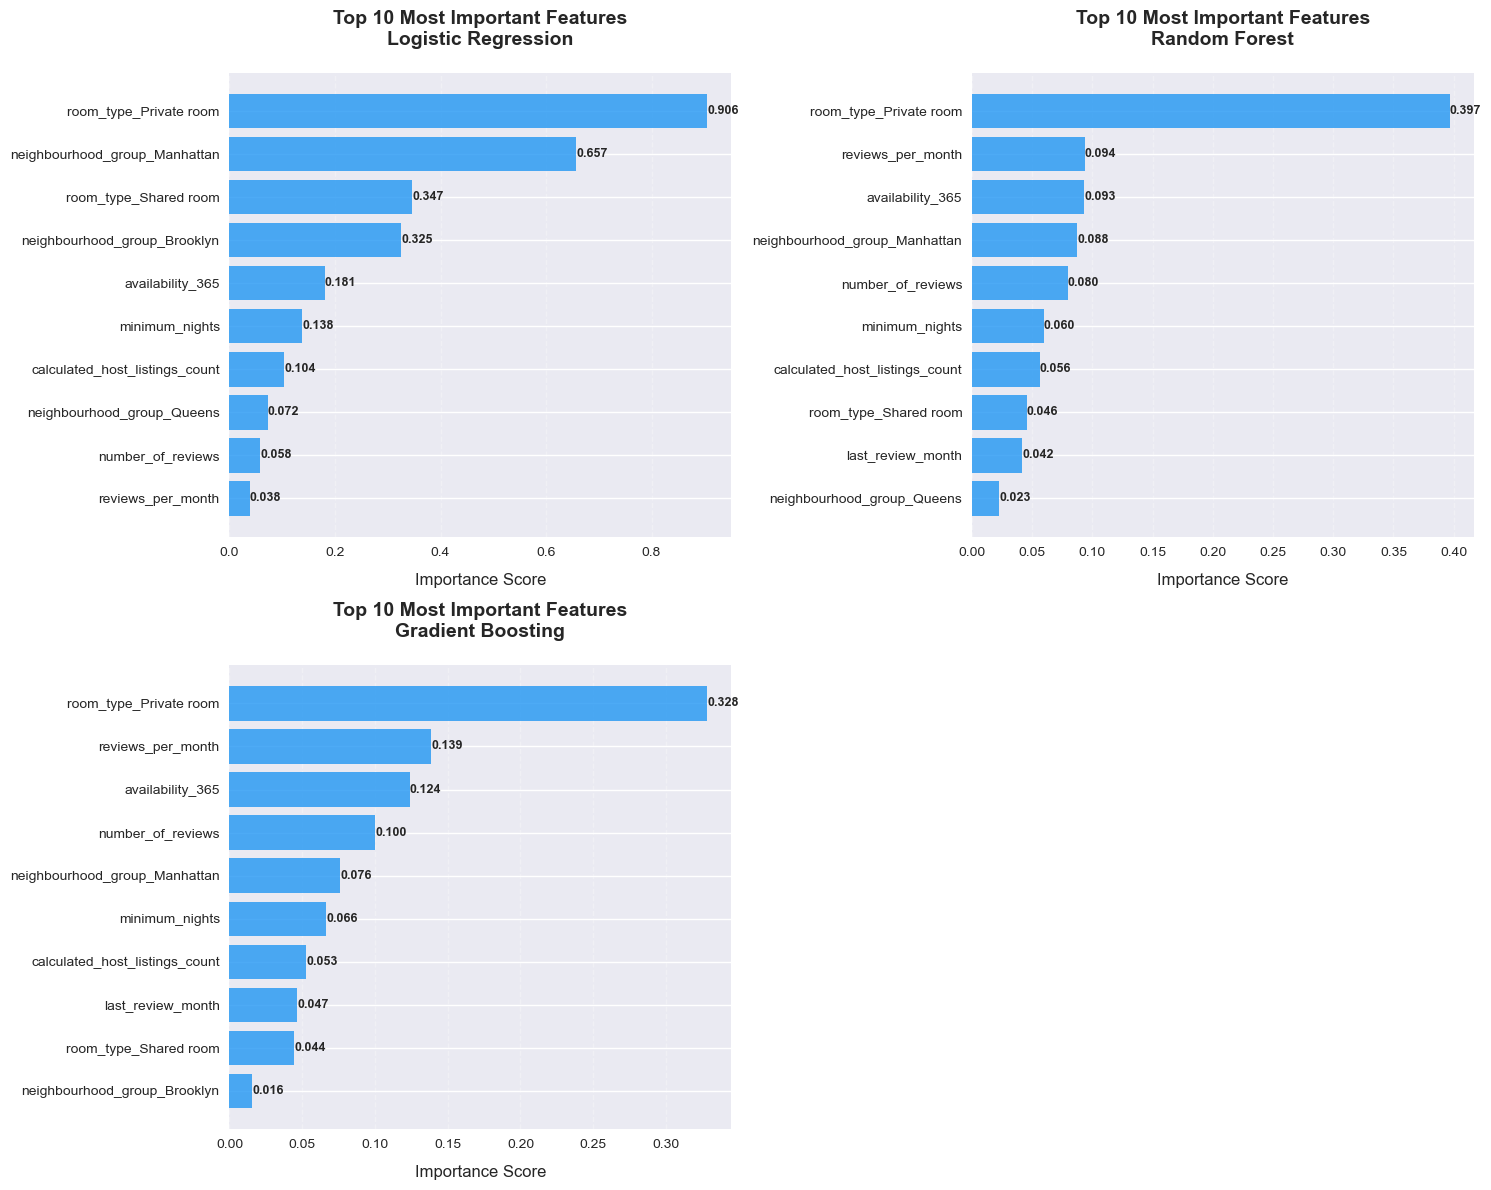

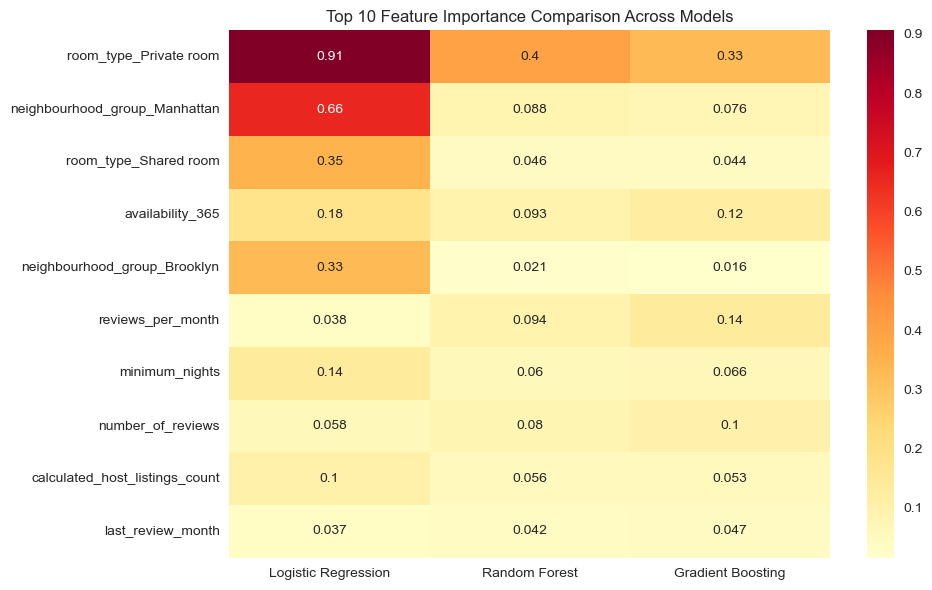


Top 10 Most Important Features (Average Across Models):
                                Mean_Importance
room_type_Private room                 0.543597
neighbourhood_group_Manhattan          0.273510
room_type_Shared room                  0.145566
availability_365                       0.132531
neighbourhood_group_Brooklyn           0.120752
reviews_per_month                      0.090097
minimum_nights                         0.088045
number_of_reviews                      0.079295
calculated_host_listings_count         0.070973
last_review_month                      0.041962


In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_performance(y_true, y_pred, y_pred_proba=None):
    """
    Comprehensive evaluation of model performance
    """
    # Basic metrics
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted'),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro Recall': recall_score(y_true, y_pred, average='macro')
    }
    
    # Per-class metrics
    classes = np.unique(y_true)
    for cls in classes:
        metrics[f'F1 (Class {cls})'] = f1_score(y_true, y_pred, average=None)[list(classes).index(cls)]
    
    # ROC-AUC and PR-AUC (if probabilities are provided)
    if y_pred_proba is not None:
        # One-hot encode true labels
        y_true_bin = label_binarize(y_true, classes=classes)
        
        # Calculate ROC-AUC for each class
        roc_auc = roc_auc_score(y_true_bin, y_pred_proba, average='macro', multi_class='ovr')
        metrics['ROC-AUC'] = roc_auc
        
        # Calculate PR-AUC for each class
        pr_aucs = []
        for i in range(len(classes)):
            precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
            pr_aucs.append(auc(recall, precision))
        metrics['PR-AUC'] = np.mean(pr_aucs)
    
    return metrics

def train_models(X_train, y_train):
    """Train models with pre-determined best parameters"""
    models = {}
    
    # 1. Logistic Regression with best params
    lr = LogisticRegression(
        C=0.1,
        max_iter=1000,
        multi_class='multinomial'
    )
    lr.fit(X_train, y_train)
    models['Logistic Regression'] = lr
    
    # 2. Random Forest with best params
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=2,
        min_samples_leaf=4,
        random_state=42
    )
    rf.fit(X_train, y_train)
    models['Random Forest'] = rf
    
    # 3. Gradient Boosting with similar complexity to RF
    gb = GradientBoostingClassifier(
        n_estimators=100,
        max_depth=10,  # Slightly lower than RF as GB tends to work better with smaller trees
        learning_rate=0.1,  # Standard learning rate
        min_samples_split=2,
        random_state=42
    )
    gb.fit(X_train, y_train)
    models['Gradient Boosting'] = gb
    
    return models

def analyze_feature_importance(df):
    """Enhanced version with better performance metrics"""
    # Previous data preparation code remains the same
    X = df.drop(['price', 'price_category', 'neighbourhood', 'cluster'], axis=1)
    y = df['price_category']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train models
    models = train_models(X_train_scaled, y_train)
    
    # Evaluate each model with enhanced metrics
    print("\nDetailed Model Performance Metrics:")
    print("=" * 50)
    
    for name, model in models.items():
        print(f"\n{name}:")
        print("-" * 30)
        
        # Get predictions and probabilities
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
        
        # Calculate comprehensive metrics
        metrics = evaluate_model_performance(y_test, y_pred, y_pred_proba)
        
        # Print metrics in a formatted way
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.4f}")
    
    # Get feature importance
    feature_importance = {}
    for name, model in models.items():
        importance = np.abs(model.coef_).mean(axis=0) if name == 'Logistic Regression' else model.feature_importances_
        feature_importance[name] = pd.Series(importance, index=X.columns)
    
    # Create and plot importance comparison
    importance_df = pd.DataFrame(feature_importance)
    importance_df['Mean_Importance'] = importance_df.mean(axis=1)
    importance_df = importance_df.sort_values('Mean_Importance', ascending=False)
    
    # Plot feature importance for each model
    plt.style.use('seaborn')  # Use seaborn style for modern look
    
    # Plot feature importance for each model
    fig = plt.figure(figsize=(15, 12))
    
    for i, (name, importance) in enumerate(feature_importance.items()):
        plt.subplot(2, 2, i+1)
        
        # Sort importance values
        sorted_importance = importance.sort_values(ascending=True)
        top_10 = sorted_importance.tail(10)
        
        # Create horizontal bar plot
        bars = plt.barh(range(len(top_10)), top_10, 
                       color='#2196F3',  # Material design blue
                       alpha=0.8)
        
        # Add value labels on the bars
        for bar in bars:
            width = bar.get_width()
            plt.text(width, bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}',
                    ha='left', va='center',
                    fontsize=9, fontweight='bold')
        
        # Customize appearance
        plt.title(f'Top 10 Most Important Features\n{name}',
                 pad=20, fontsize=14, fontweight='bold')
        plt.xlabel('Importance Score', fontsize=12, labelpad=10)
        plt.yticks(range(len(top_10)), top_10.index, fontsize=10)
        
        # Add grid
        plt.grid(axis='x', linestyle='--', alpha=0.3)
        
        # Remove top and right spines
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()


    # Original heatmap visualization
    plt.figure(figsize=(10, 6))
    sns.heatmap(importance_df[models.keys()].head(10), annot=True, cmap='YlOrRd')
    plt.title('Top 10 Feature Importance Comparison Across Models')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features (Average Across Models):")
    print(importance_df[['Mean_Importance']].head(10))
    
    return importance_df, models


# Usage:
importance_results, models = analyze_feature_importance(data)

In [21]:
X = data.drop(['price', 'price_category', 'neighbourhood', 'cluster'], axis=1)
y = data['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = train_models(X_train_scaled, y_train)

c:\ProgramData\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [22]:
def interpret_metrics(metrics, threshold_guidelines={
    'Accuracy': {'good': 0.7, 'excellent': 0.85},
    'F1': {'good': 0.6, 'excellent': 0.8},
    'ROC-AUC': {'good': 0.8, 'excellent': 0.9},
    'PR-AUC': {'good': 0.7, 'excellent': 0.85}
}):
    """
    Interpret model performance metrics with explanations
    """
    interpretations = []
    
    # Accuracy Interpretation
    acc = metrics['Accuracy']
    interpretations.append(f"""
    1. Accuracy: {acc:.3f}
    - Meaning: {acc*100:.1f}% of all predictions are correct
    - Context: For price categories, this means we correctly classify this portion of listings
    - Assessment: {
        'Excellent' if acc >= threshold_guidelines['Accuracy']['excellent']
        else 'Good' if acc >= threshold_guidelines['Accuracy']['good']
        else 'Needs Improvement'
    }
    """)

    # F1 Score Interpretation
    f1_macro = metrics['Macro F1']
    interpretations.append(f"""
    2. Macro F1 Score: {f1_macro:.3f}
    - Meaning: Balanced measure of precision and recall across all price categories
    - Context: Higher values mean the model is good at both:
      * Finding actual listings in each price category (recall)
      * Not misclassifying listings into wrong categories (precision)
    - Assessment: {
        'Excellent' if f1_macro >= threshold_guidelines['F1']['excellent']
        else 'Good' if f1_macro >= threshold_guidelines['F1']['good']
        else 'Needs Improvement'
    }
    """)

    # ROC-AUC Interpretation
    if 'ROC-AUC' in metrics:
        roc_auc = metrics['ROC-AUC']
        interpretations.append(f"""
    3. ROC-AUC Score: {roc_auc:.3f}
    - Meaning: Model's ability to distinguish between price categories
    - Context: 
      * 0.5 = Random guessing
      * 1.0 = Perfect separation
      * > 0.8 generally indicates good discriminative ability
    - Assessment: {
        'Excellent' if roc_auc >= threshold_guidelines['ROC-AUC']['excellent']
        else 'Good' if roc_auc >= threshold_guidelines['ROC-AUC']['good']
        else 'Needs Improvement'
    }
    """)

    # PR-AUC Interpretation
    if 'PR-AUC' in metrics:
        pr_auc = metrics['PR-AUC']
        interpretations.append(f"""
    4. PR-AUC Score: {pr_auc:.3f}
    - Meaning: Model's ability to maintain precision as recall increases
    - Context: Especially important if price categories are imbalanced
    - Assessment: {
        'Excellent' if pr_auc >= threshold_guidelines['PR-AUC']['excellent']
        else 'Good' if pr_auc >= threshold_guidelines['PR-AUC']['good']
        else 'Needs Improvement'
    }
    """)

    # Per-class F1 Interpretation
    class_f1s = {k: v for k, v in metrics.items() if k.startswith('F1 (Class')}
    interpretations.append("""
    5. Per-Class F1 Scores:""")
    for class_name, f1 in class_f1s.items():
        category = class_name.split('(Class ')[1].rstrip(')')
        interpretations.append(f"""
       {category}: {f1:.3f}
       - Indicates how well the model performs for {category} price range
       - {
           'Very balanced performance' if f1 >= 0.8
           else 'Good balance' if f1 >= 0.6
           else 'May need attention for this category'
       }""")

    return "\n".join(interpretations)

# Example usage in your analyze_feature_importance function:
def analyze_feature_importance(data):
    # ... (previous code) ...
    for name, model in models.items():
        print(f"\n{name} Performance Analysis:")
        print("=" * 50)
        
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
        metrics = evaluate_model_performance(y_test, y_pred, y_pred_proba)
        
        # Print detailed interpretation
        print(interpret_metrics(metrics))

In [23]:
analyze_feature_importance(data)


Logistic Regression Performance Analysis:

    1. Accuracy: 0.633
    - Meaning: 63.3% of all predictions are correct
    - Context: For price categories, this means we correctly classify this portion of listings
    - Assessment: Needs Improvement
    

    2. Macro F1 Score: 0.633
    - Meaning: Balanced measure of precision and recall across all price categories
    - Context: Higher values mean the model is good at both:
      * Finding actual listings in each price category (recall)
      * Not misclassifying listings into wrong categories (precision)
    - Assessment: Good
    

    3. ROC-AUC Score: 0.808
    - Meaning: Model's ability to distinguish between price categories
    - Context: 
      * 0.5 = Random guessing
      * 1.0 = Perfect separation
      * > 0.8 generally indicates good discriminative ability
    - Assessment: Good
    

    4. PR-AUC Score: 0.660
    - Meaning: Model's ability to maintain precision as recall increases
    - Context: Especially important if

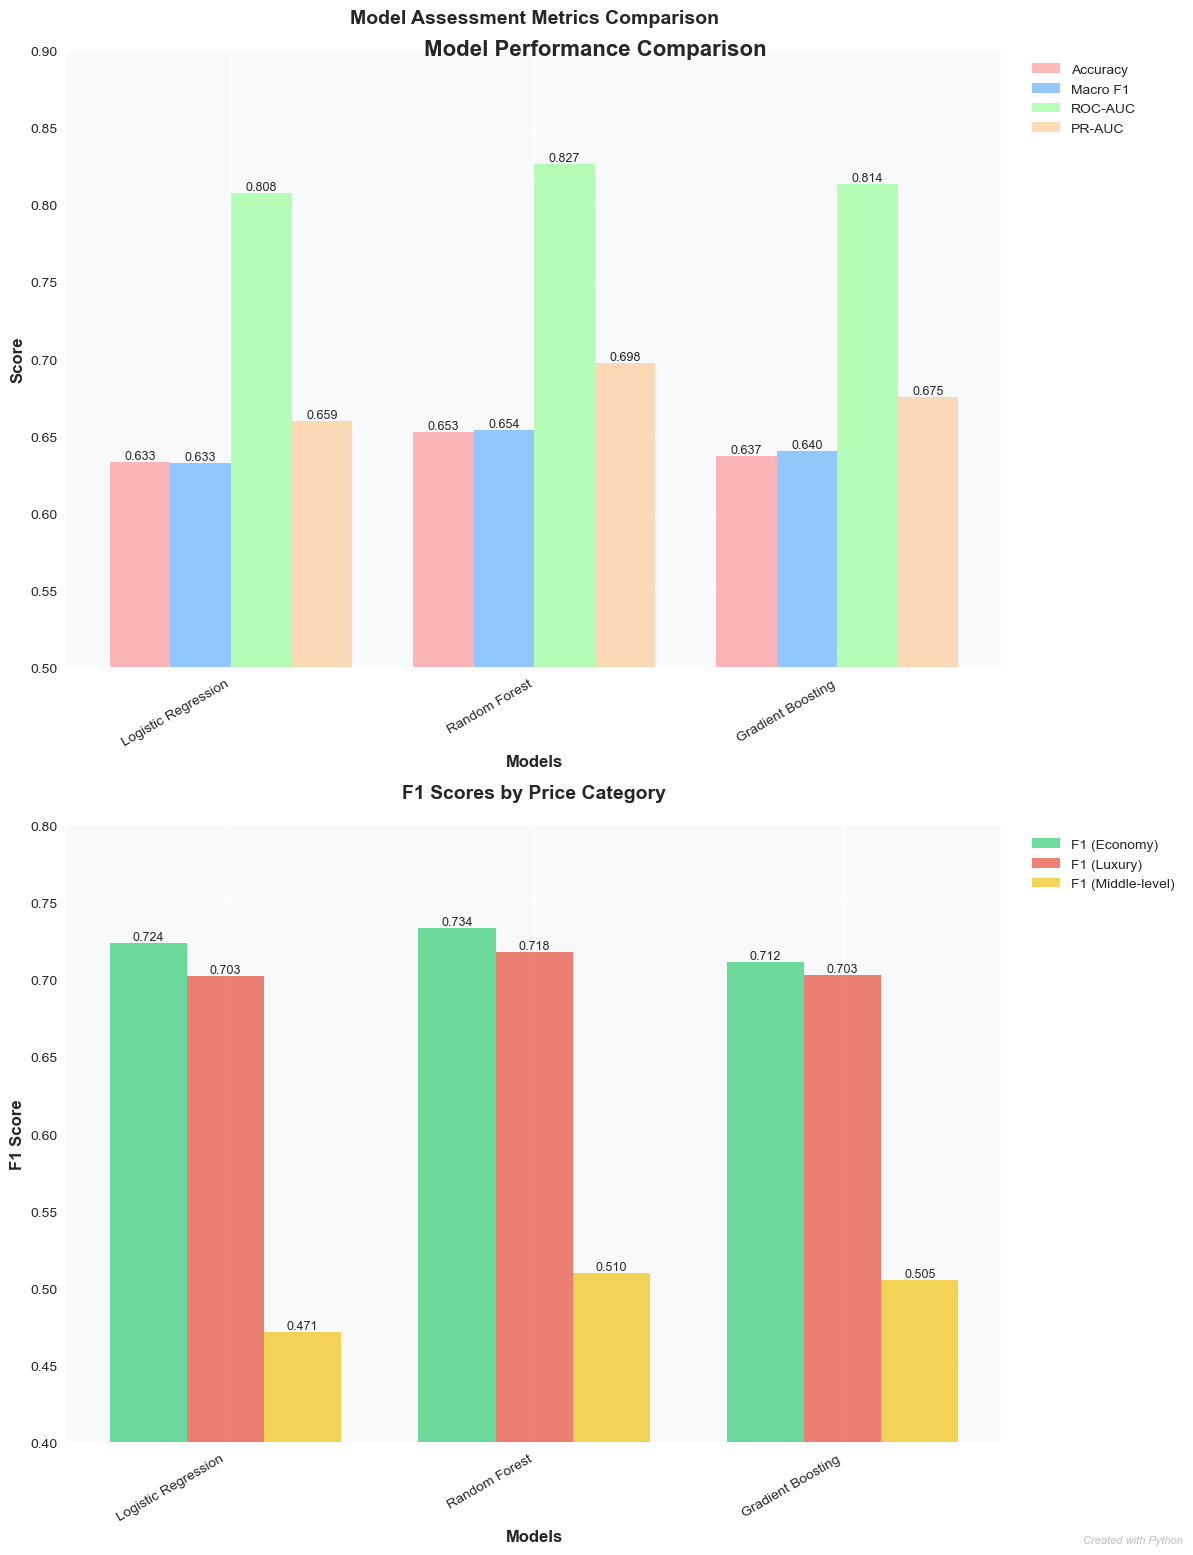

In [44]:
# Create two subplots with a modern style
plt.style.use('seaborn-v0_8')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Define metrics data
assessment_metrics = {
    'Accuracy': [0.6330, 0.6530, 0.6373],
    'Macro F1': [0.6326, 0.6540, 0.6401], 
    'ROC-AUC': [0.8078, 0.8267, 0.8138],
    'PR-AUC': [0.6595, 0.6976, 0.6753]
}

f1_metrics = {
    'F1 (Economy)': [0.7238, 0.7340, 0.7119],
    'F1 (Luxury)': [0.7027, 0.7181, 0.7033],
    'F1 (Middle-level)': [0.4713, 0.5099, 0.5052]
}

models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Define color schemes
colors1 = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Soft colors for assessment metrics
colors2 = ['#2ecc71', '#e74c3c', '#f1c40f']  # Distinct colors for F1 scores

# Plot 1: Assessment Metrics
x = np.arange(len(models))
width = 0.2

for idx, (metric, scores) in enumerate(assessment_metrics.items()):
    offset = width * (idx - len(assessment_metrics)/2 + 0.5)
    bars = ax1.bar(x + offset, scores, width, label=metric, color=colors1[idx], alpha=0.7)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

ax1.set_xlabel('Models', fontsize=12, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Assessment Metrics Comparison', fontsize=14, pad=20, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=30, ha='right')
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_ylim(0.5, 0.9)

# Add subtle background color
ax1.set_facecolor('#f8f9fa')

# Plot 2: F1 Scores
width = 0.25
for idx, (metric, scores) in enumerate(f1_metrics.items()):
    offset = width * (idx - len(f1_metrics)/2 + 0.5)
    bars = ax2.bar(x + offset, scores, width, label=metric, color=colors2[idx], alpha=0.7)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

ax2.set_xlabel('Models', fontsize=12, fontweight='bold')
ax2.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax2.set_title('F1 Scores by Price Category', fontsize=14, pad=20, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=30, ha='right')
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.set_ylim(0.4, 0.8)

# Add subtle background color
ax2.set_facecolor('#f8f9fa')

# Add a super title
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=0.95)

# Adjust layout
plt.tight_layout()

# Add watermark
fig.text(0.99, 0.01, 'Created with Python', 
         fontsize=8, color='gray', ha='right', 
         style='italic', alpha=0.5)

plt.show()


Logistic Regression Performance Analysis:
==================================================

    1. Accuracy: 0.633
    - Meaning: 63.3% of all predictions are correct
    - Context: For price categories, this means we correctly classify this portion of listings
    - Assessment: Needs Improvement
    

    2. Macro F1 Score: 0.633
    - Meaning: Balanced measure of precision and recall across all price categories
    - Context: Higher values mean the model is good at both:
      * Finding actual listings in each price category (recall)
      * Not misclassifying listings into wrong categories (precision)
    - Assessment: Good
    

    3. ROC-AUC Score: 0.808
    - Meaning: Model's ability to distinguish between price categories
    - Context: 
      * 0.5 = Random guessing
      * 1.0 = Perfect separation
      * > 0.8 generally indicates good discriminative ability
    - Assessment: Good
    

    4. PR-AUC Score: 0.660
    - Meaning: Model's ability to maintain precision as recall increases
    - Context: Especially important if price categories are imbalanced
    - Assessment: Needs Improvement
    

    5. Per-Class F1 Scores:

       Economy: 0.724
       - Indicates how well the model performs for Economy price range
       - Good balance

       Luxury: 0.703
       - Indicates how well the model performs for Luxury price range
       - Good balance

       Middle-level: 0.471
       - Indicates how well the model performs for Middle-level price range
       - May need attention for this category

Random Forest Performance Analysis:
==================================================

    1. Accuracy: 0.653
    - Meaning: 65.3% of all predictions are correct
    - Context: For price categories, this means we correctly classify this portion of listings
    - Assessment: Needs Improvement
    

    2. Macro F1 Score: 0.654
    - Meaning: Balanced measure of precision and recall across all price categories
    - Context: Higher values mean the model is good at both:
      * Finding actual listings in each price category (recall)
      * Not misclassifying listings into wrong categories (precision)
    - Assessment: Good
    

    3. ROC-AUC Score: 0.827
    - Meaning: Model's ability to distinguish between price categories
    - Context: 
      * 0.5 = Random guessing
      * 1.0 = Perfect separation
      * > 0.8 generally indicates good discriminative ability
    - Assessment: Good
    

    4. PR-AUC Score: 0.698
    - Meaning: Model's ability to maintain precision as recall increases
    - Context: Especially important if price categories are imbalanced
    - Assessment: Needs Improvement
    

    5. Per-Class F1 Scores:

       Economy: 0.734
       - Indicates how well the model performs for Economy price range
       - Good balance

       Luxury: 0.718
       - Indicates how well the model performs for Luxury price range
       - Good balance

       Middle-level: 0.510
       - Indicates how well the model performs for Middle-level price range
       - May need attention for this category

Gradient Boosting Performance Analysis:
==================================================

    1. Accuracy: 0.637
    - Meaning: 63.7% of all predictions are correct
    - Context: For price categories, this means we correctly classify this portion of listings
    - Assessment: Needs Improvement
    

    2. Macro F1 Score: 0.640
    - Meaning: Balanced measure of precision and recall across all price categories
    - Context: Higher values mean the model is good at both:
      * Finding actual listings in each price category (recall)
      * Not misclassifying listings into wrong categories (precision)
    - Assessment: Good
    

    3. ROC-AUC Score: 0.814
    - Meaning: Model's ability to distinguish between price categories
    - Context: 
      * 0.5 = Random guessing
      * 1.0 = Perfect separation
      * > 0.8 generally indicates good discriminative ability
    - Assessment: Good
    

    4. PR-AUC Score: 0.675
    - Meaning: Model's ability to maintain precision as recall increases
    - Context: Especially important if price categories are imbalanced
    - Assessment: Needs Improvement
    

    5. Per-Class F1 Scores:

       Economy: 0.712
       - Indicates how well the model performs for Economy price range
       - Good balance

       Luxury: 0.703
       - Indicates how well the model performs for Luxury price range
       - Good balance

       Middle-level: 0.505
       - Indicates how well the model performs for Middle-level price range
       - May need attention for this category
